# Annex to "An adaptive algorithm for unsupervised learning"




In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)
seed = 42
np.random.seed(seed)

In [152]:
# for figures
import matplotlib.pyplot as plt

fontsize = 12
FORMATS = ['.png']
FORMATS = ['.pdf', '.eps', '.svg']
FORMATS = ['.png', '.pdf']
FORMATS = ['.pdf']
FORMATS = ['.pdf', '.eps', '.png', '.tiff']
FORMATS = ['.pdf', '.png', '.tiff']
dpi_export = 600

fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
fig_width_pt = 450  # Get this from LaTeX using \showthe\columnwidth
#fig_width_pt = 1024 #221     # Get this from LaTeX using \showthe\columnwidth / x264 asks for a multiple of 2
ppi = 72.27 # (constant) definition of the ppi = points per inch
inches_per_pt = 1.0/dpi  # Convert pt to inches
#inches_per_cm = 1./2.54
fig_width = fig_width_pt*inches_per_pt  # width in inches
grid_fig_width = 2*fig_width
phi = (np.sqrt(5) + 1. ) /2
#legend.fontsize = 8
#fig_width = 9
fig_height = fig_width/phi
figsize = (fig_width, fig_height)


def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
            spine.set_smart_bounds(True)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

import matplotlib
pylab_defaults = { 
    'font.size': 10,
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium',
    'text.usetex': False,
#    'font.family' : 'sans-serif',
#    'font.sans-serif' : ['Helvetica'],
    }
    
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
matplotlib.rcParams.update(pylab_defaults)
#matplotlib.rcParams.update({'text.usetex': True})

import matplotlib.cm as cm

hl, hs = 10*'🐶', 10*''


In [4]:
tag = 'NIPS'

In [5]:
from shl_scripts.shl_experiments import SHL
shl = SHL(datapath='../../SHL_master/database')
data = shl.get_data(matname=tag + '_test')

In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (65520, 324)
average of patches =  -1.3425387896193824e-05  +/-  0.005884598016072352
average energy of data =  0.18808326809398868 +/- 0.07074991784868241


## figure 1:  Role of homeostasis in learning sparse representations

### learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -8.692796474764865e-06 +/- 0.0012070128834641306
average energy of filters =  1.0 +/- 3.6627860693020265e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -3.7572126780917665e-05 +/- 0.001176508946594282
average energy of filters =  1.0 +/- 3.9562611248144994e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  8.795459492566386e-06 +/- 0.0011308545789973006
average energy of filters =  1.0 +/- 3.4667710629733767e-17


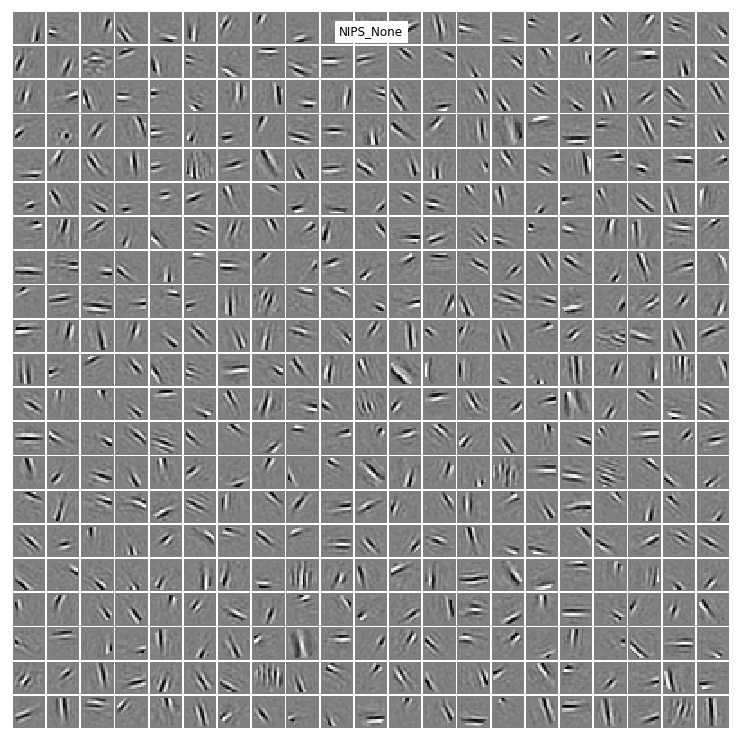

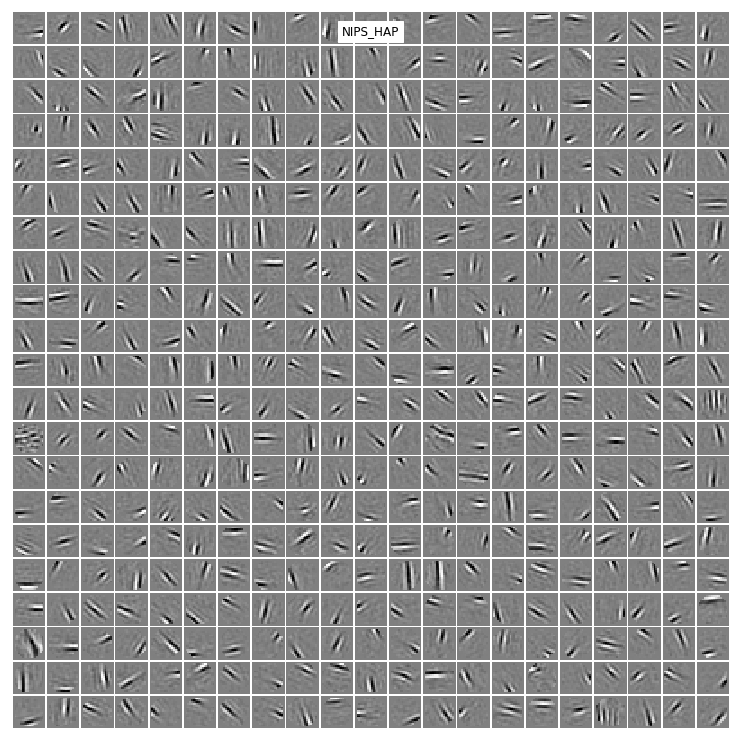

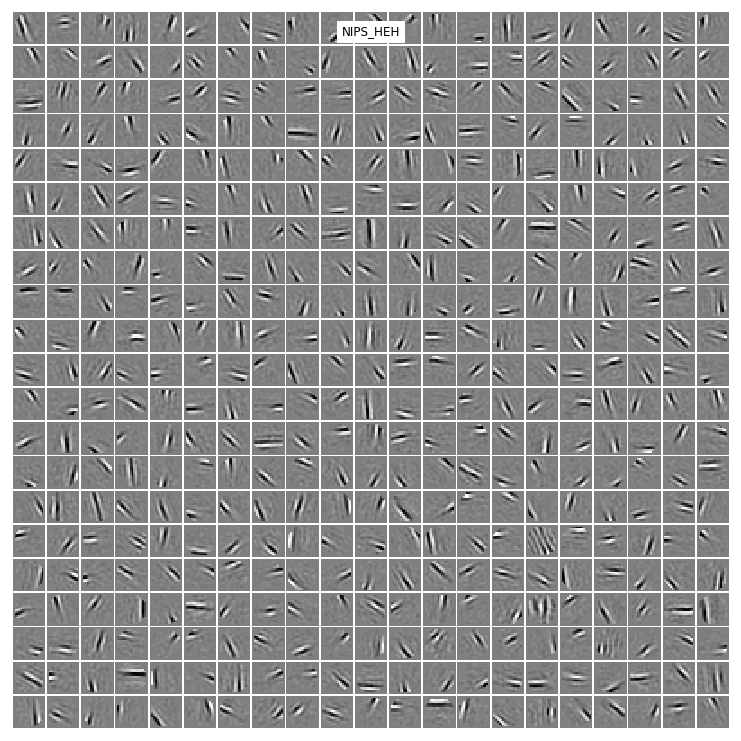

In [7]:
homeo_methods = ['None', 'OLS', 'HEH']

list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'time_plot_MC', 'show_Pcum']
list_figures = ['show_dico']
dico = {}
for homeo_method in homeo_methods:
    print(hl + hs + homeo_method + hs + hl)
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)

    print('size of dictionary = (number of filters, size of imagelets) = ', dico[homeo_method].dictionary.shape)
    print('average of filters = ',  dico[homeo_method].dictionary.mean(axis=1).mean(), 
          '+/-',  dico[homeo_method].dictionary.mean(axis=1).std())
    SE = np.sqrt(np.sum(dico[homeo_method].dictionary**2, axis=1))
    print('average energy of filters = ', SE.mean(), '+/-', SE.std())


### plotting only a few 



(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10ed5b198>)

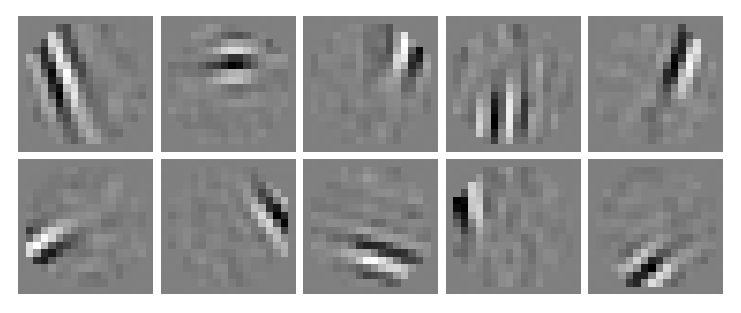

In [8]:
from shl_scripts import show_dico
show_dico(shl, dico[homeo_method], dim_graph=(2,5))

In [153]:
homeo_methods

['None', 'HAP', 'HEH']

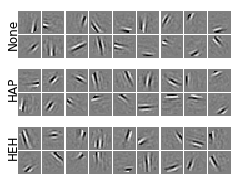

In [154]:
dim_graph = (2, 9)

subplotpars = dict( left=0.042, right=1., bottom=0., top=1., wspace=0.05, hspace=0.05,)
fig, axs = plt.subplots(3, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)

for ax, homeo_method in zip(axs.ravel(), homeo_methods): 
    ax.axis(c='b', lw=2, axisbg='w')
    ax.set_facecolor('w')
    from shl_scripts import show_dico
    fig, ax = show_dico(shl, dico[homeo_method], dim_graph=dim_graph, fig=fig, ax=ax)
    # ax.set_ylabel(homeo_method)
    ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color='k', rotation=90)#, backgroundcolor='white'

for ext in FORMATS: fig.savefig('figure_map_A' + ext, dpi=dpi_export)

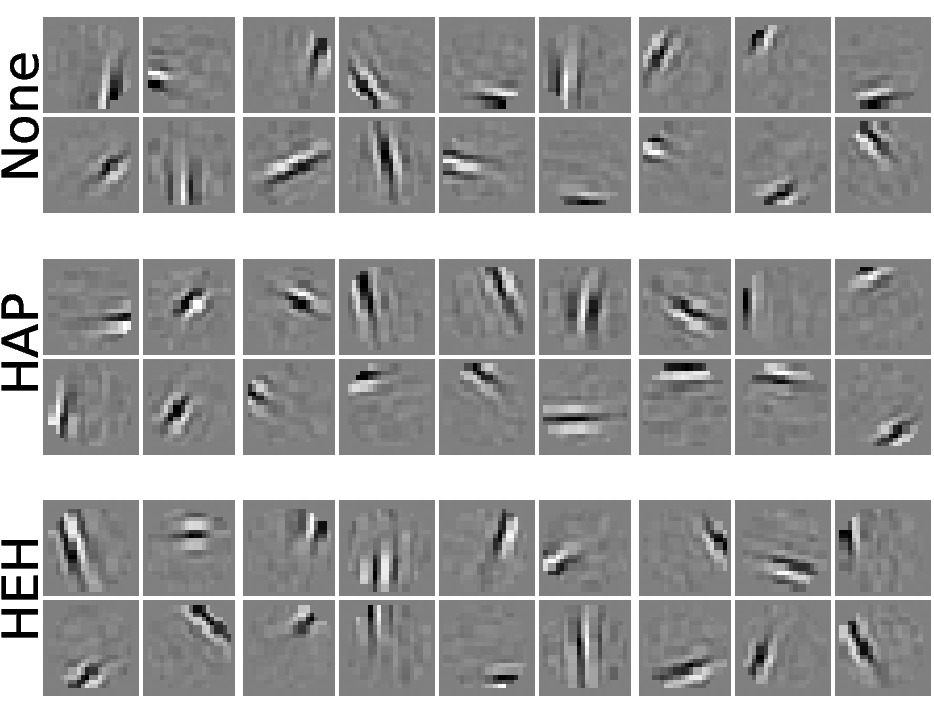

In [155]:
from IPython.display import SVG, Image
Image(fname +'_A.jpg')

In [156]:
for ext in FORMATS: fig.savefig('figure_map_B' + ext)    

In [157]:
help(fig.subplots_adjust)

Help on method subplots_adjust in module matplotlib.figure:

subplots_adjust(*args, **kwargs) method of matplotlib.figure.Figure instance
    Call signature::
    
      subplots_adjust(left=None, bottom=None, right=None, top=None,
                          wspace=None, hspace=None)
    
    Update the :class:`SubplotParams` with *kwargs* (defaulting to rc when
    *None*) and update the subplot locations.



In [158]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:
    
            - True or 'all': x- or y-axis will be shared among all
              subplots.
            - False or 'none': each subplot x- or y-axis will be
              independent.
            - 'row': each subplot row will share an x- or y-axis.
            - 'col': each subplot column will share an x- or y-axis.
    
        Whe

In [159]:
help(matplotlib.gridspec.GridSpec)

Help on class GridSpec in module matplotlib.gridspec:

class GridSpec(GridSpecBase)
 |  A class that specifies the geometry of the grid that a subplot
 |  will be placed. The location of grid is determined by similar way
 |  as the SubplotParams.
 |  
 |  Method resolution order:
 |      GridSpec
 |      GridSpecBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, nrows, ncols, figure=None, left=None, bottom=None, right=None, top=None, wspace=None, hspace=None, width_ratios=None, height_ratios=None)
 |      The number of rows and number of columns of the grid need to be set.
 |      Optionally, the subplot layout parameters (e.g., left, right, etc.)
 |      can be tuned.
 |      
 |      Parameters
 |      ----------
 |      nrows : int
 |          Number of rows in grid.
 |      
 |      ncols : int
 |          Number or columns in grid.
 |      
 |      Notes
 |      -----
 |      See `~.figure.SubplotParams` for descriptions


### Montage of the subplots


In [121]:
import tikzmagic

In [122]:
%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


In [123]:
help(tikzmagic)

Help on module tikzmagic:

NAME
    tikzmagic

DESCRIPTION
    tikzmagic
     
    Magics for generating figures with TikZ.
     
    .. note::
     
      ``TikZ`` and ``LaTeX`` need to be installed separately.
     
    Usage
    =====
     
    ``%%tikz``
     
            ::
    
      %tikz [-sc SCALE] [-s SIZE] [-f FORMAT] [-e ENCODING] [-x PREAMBLE]
                [-p PACKAGE] [-l LIBRARY] [-S SAVE]
                [code [code ...]]
    
    Run TikZ code in LaTeX and plot result.
    
        In [9]: %tikz \draw (0,0) rectangle (1,1);
    
    As a cell, this will run a block of TikZ code::
    
        In [10]: %%tikz
           ....: \draw (0,0) rectangle (1,1);
    
    In the notebook, plots are published as the output of the cell.
    
    The size and format of output plots can be specified::
    
        In [18]: %%tikz -s 600,800 -f svg --scale 2
            ...: \draw (0,0) rectangle (1,1);
            ...: illdraw (0.5,0.5) circle (.1);
    
    TikZ packages can be

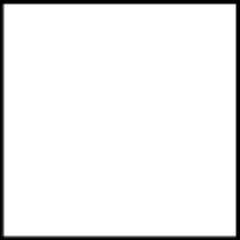

In [124]:
%tikz \draw (0,0) rectangle (1,1);

In [125]:
fname = 'figure_map'

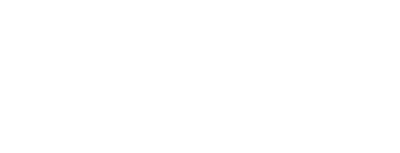

In [160]:
%%tikz --save {fname}.pdf
\draw[white, fill=white] (0.\linewidth,0) rectangle (1.\linewidth, .382\linewidth) ;

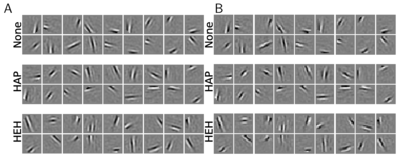

In [170]:
%%tikz --save {fname}.pdf
\draw[white, fill=white] (0.\linewidth,0) rectangle (1.\linewidth, .382\linewidth) ;
\draw [anchor=north west] (0, .382\linewidth) node {\includegraphics[width=.5\linewidth]{figure_map_A}};
\draw [anchor=north west] (.5\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{figure_map_B}};
\begin{scope}[font=\bf\sffamily\large]
\draw [anchor=west,fill=white] (.0\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{A}$};
\draw [anchor=west,fill=white] (.55\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{B}$};
\end{scope}

convert: profile 'icc': 'RGB ': RGB color space not permitted on grayscale PNG `figure_map.png' @ warning/png.c/MagickPNGWarningHandler/1744.


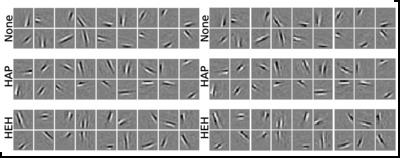

In [162]:
!convert  -density 300 {fname}.pdf {fname}.jpg
!convert  -density 600 {fname}.pdf {fname}.png
!convert  -density 600 -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff
from IPython.display import SVG, Image
Image(fname +'.jpg')

In [163]:
!echo "width=" ; convert {fname}.tiff -format "%[fx:w]" info:
!echo ", \nheight=" ; convert {fname}.tiff -format "%[fx:h]" info:
!echo ", \nunit=" ; convert {fname}.tiff -format "%U" info:

width=
5400, 
height=
2133, 
unit=
PixelsPerInch

In [164]:
!identify {fname}.tiff

figure_map.tiff TIFF 5400x2133 5400x2133+0+0 8-bit Grayscale Gray 2.30062MiB 0.000u 0:00.000


## figure 2: 

### learning


In [ ]:
list_figures = ['show_Pcum']

hl, hs = 10*'🐶', 10*''
dico = {}
for homeo_method in homeo_methods:
    print(hl + hs + homeo_method + hs + hl)
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)



## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

In [ ]:
record_num_batches = 2**12

indx = np.random.permutation(data.shape[0])[:record_num_batches]

#sparse_code = shl.code(data, dico_, matname=matname)
P_cum_zeroeffect = np.linspace(0, 1, shl.nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))
#P_cum = dico_.P_cum
#P_cum = None
#l0_sparseness = 150
l0_sparseness = shl.l0_sparseness


from shl_scripts.shl_tools import show_data, print_stats
coding_gain = {}
for homeo_method in homeo_methods:
    coding_gain[homeo_method] = {}
    print(42*'🐶')
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    print(42*'🐶')

    from shl_scripts.shl_encode import mp
    labels = ['Non', 'One', 'Hom']
    for P_cum, gain, label in zip([None, P_cum_zeroeffect, dico[homeo_method].P_cum], [np.ones(shl.n_dictionary), None, None], labels):
        sparse_code = mp(data[indx, :], dico[homeo_method].dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)
        SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code)
        coding_gain[homeo_method][label] = (SD/SE).mean()


## figure 2: 

### learning


🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -8.692796474764865e-06 +/- 0.0012070128834641306
average energy of filters =  1.0 +/- 3.6627860693020265e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -3.7572126780917665e-05 +/- 0.001176508946594282
average energy of filters =  1.0 +/- 3.9562611248144994e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  8.795459492566386e-06 +/- 0.0011308545789973006
average energy of filters =  1.0 +/- 3.4667710629733767e-17


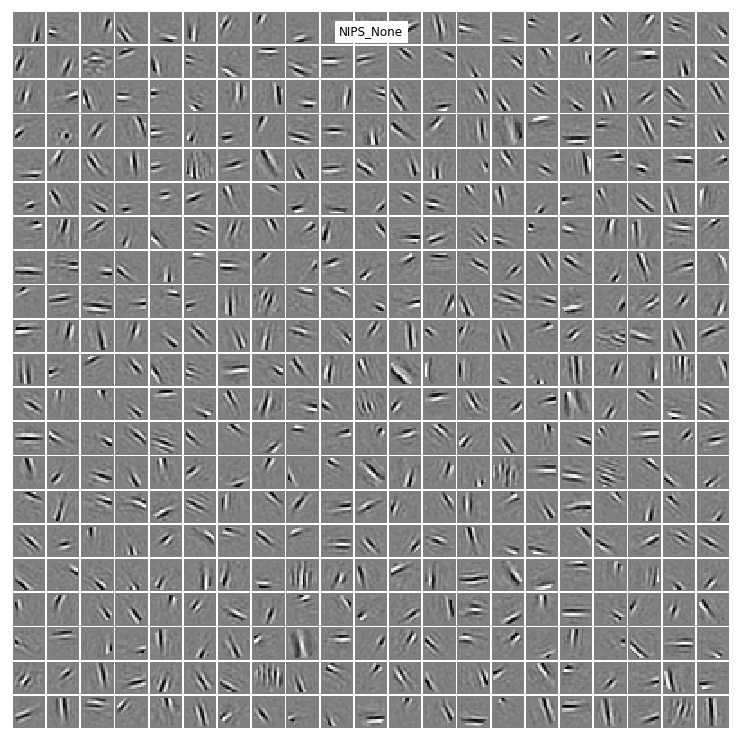

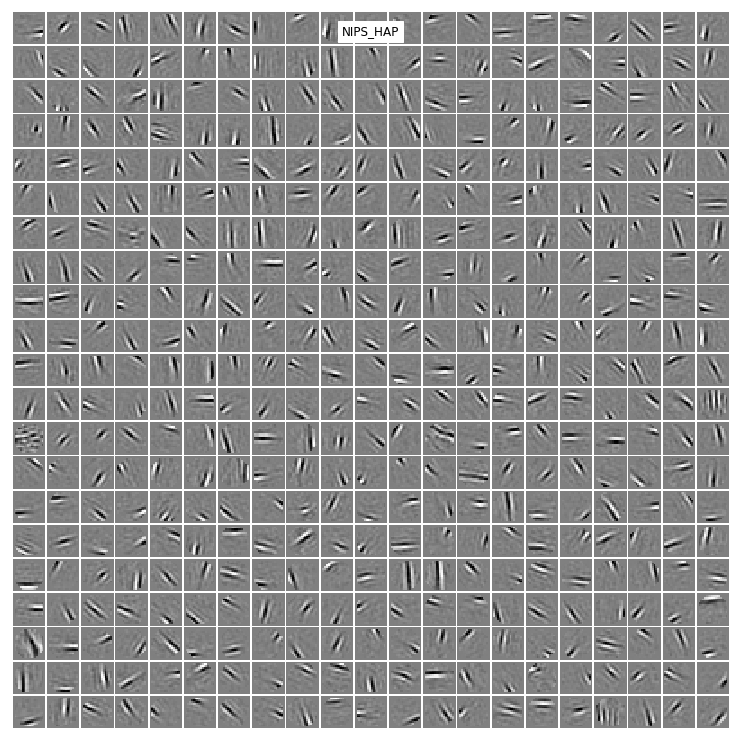

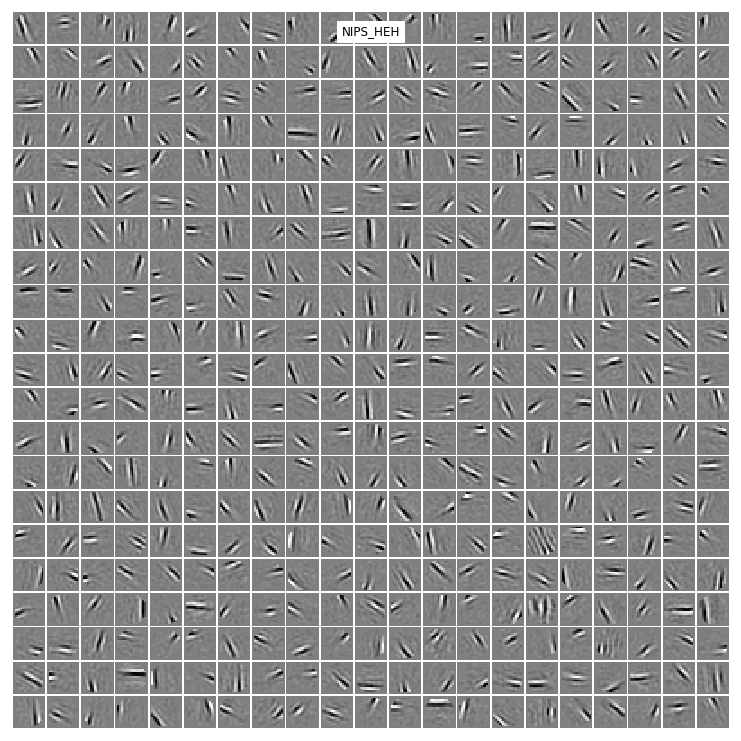

In [7]:
homeo_methods = ['EMP', 'HAP', 'HEH']

list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'time_plot_MC', 'show_Pcum']
list_figures = ['show_dico']
dico = {}
for homeo_method in homeo_methods:
    print(hl + hs + homeo_method + hs + hl)
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)

    print('size of dictionary = (number of filters, size of imagelets) = ', dico[homeo_method].dictionary.shape)
    print('average of filters = ',  dico[homeo_method].dictionary.mean(axis=1).mean(), 
          '+/-',  dico[homeo_method].dictionary.mean(axis=1).std())
    SE = np.sqrt(np.sum(dico[homeo_method].dictionary**2, axis=1))
    print('average energy of filters = ', SE.mean(), '+/-', SE.std())


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts